In [1]:
import os
import sys
import json
import time
import requests

from dotenv import load_dotenv

def setup_env():
    
    env_path = os.path.join(os.getcwd(), '../.env')

    if os.path.exists(env_path):
        load_dotenv(dotenv_path=env_path)
        
        print(f"Loaded environment variables from: \033[94m{env_path}\033[0m")
    else:
            print("\033[91mError: .env file not found. Please create one with your OPENAI_API_KEY.\033[0m")
            sys.exit(1)

setup_env()

Loaded environment variables from: /home/ras/0.agent_ai_ws/src/learn_rag_and_agent/learn_rag_and_agent/../.env


In [2]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]

In [3]:
from langchain_openai import ChatOpenAI

# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}

In [4]:
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

In [5]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")

In [6]:
# 그래프 컴파일
graph = graph_builder.compile()

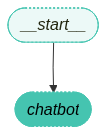

In [7]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)

In [8]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 서울에는 다양한 맛집이 많아서 선택하기가 쉽지 않지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **이태원 부대찌개** - 부대찌개로 유명한 이곳은 푸짐한 양과 깊은 맛으로 많은 사랑을 받고 있습니다.

3. **명동교자** - 칼국수와 만두가 유명한 곳으로, 항상 많은 사람들이 줄 서서 기다리는 인기 맛집입니다.

4. **삼청동 수제비** - 수제비와 전통 한식을 즐길 수 있는 아늑한 분위기의 식당입니다.

5. **한남동 고기리 막창** - 신선한 막창과 다양한 고기 요리를 제공하는 곳으로, 고기 애호가들에게 추천합니다.

6. **을지로 골뱅이** - 골뱅이 무침과 소주가 잘 어울리는 곳으로, 분위기도 좋고 맛도 뛰어납니다.

7. **홍대 돈부리** - 일본식 덮밥 전문점으로, 다양한 종류의 돈부리를 맛볼 수 있습니다.

8. **압구정 로데오 거리의 카페 드 파리** - 디저트와 브런치로 유명한 카페로, 예쁜 인테리어와 맛있는 음식을 제공합니다.

9. **신사동 가로수길의 브런치 카페** - 다양한 브런치 메뉴와 커피를 즐길 수 있는 인기 카페입니다.

10. **종로의 한정식집** - 전통 한정식을 제공하는 곳으로, 정갈한 반찬과 함께 한국의 맛을 경험할 수 있습니다.

각 식당의 운영 시간이나 메뉴는 변동이 있을 수 있으니 방문 전에 확인해 보시는 것이 좋습니다. 맛있는 식사 되세요!


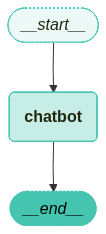

서울에는 다양한 맛집이 많아서 선택하기가 쉽지 않지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **부암동 카페거리** - 예쁜 카페와 함께 다양한 디저트를 제공하는 곳으로, 특히 '부암동 카페'는 유명합니다.

3. **이태원 앤틱 가구 거리** - 이태원에는 다양한 국제 요리를 제공하는 레스토랑이 많습니다. '부라더스 피자'와 같은 인기 피자집도 추천합니다.

4. **명동 교자** - 칼국수와 만두가 유명한 곳으로, 항상 많은 사람들이 찾는 맛집입니다.

5. **삼청동 수제비** - 수제비와 전통 음식을 맛볼 수 있는 아늑한 분위기의 식당입니다.

6. **신사동 가로수길** - 다양한 트렌디한 카페와 레스토랑이 모여 있는 곳으로, '카페 드 파리'의 망고 빙수는 꼭 맛봐야 합니다.

7. **종로 통인시장** - 다양한 전통 음식을 저렴하게 즐길 수 있는 시장으로, 특히 김밥과 떡볶이가 인기입니다.

8. **홍대입구** - 다양한 음식점과 바가 밀집해 있는 지역으로, '홍대 돈부리'와 같은 일본식 덮밥집이 유명합니다.

9. **압구정 로데오거리** - 고급 레스토랑과 카페가 많은 지역으로, '미슐랭 가이드'에 선정된 레스토랑도 있습니다.

10. **강남역** - 다양한 패스트푸드와 한식, 중식, 일식 등 다양한 음식을 즐길 수 있는 곳으로, '강남역 쭈꾸미'가 유명합니다.

이 외에도 서울에는 많은 맛집이 있으니, 방문하실 때마다 새로운 곳을 탐방해 보세요!


In [9]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph


###### STEP 1. 상태(State) 정의 ######
class State(TypedDict):
    # 메시지 정의(list type 이며 add_messages 함수를 사용하여 메시지를 추가)
    messages: Annotated[list, add_messages]


###### STEP 2. 노드(Node) 정의 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}


###### STEP 3. 그래프(Graph) 정의, 노드 추가 ######
# 그래프 생성
graph_builder = StateGraph(State)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("chatbot", chatbot)

###### STEP 4. 그래프 엣지(Edge) 추가 ######
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")

# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
visualize_graph(graph)

###### STEP 7. 그래프 실행 ######
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print(value["messages"][-1].content)